# Case 03: Vendas em E-commerce
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 1rem; right: 40px; border-radius: 5px;" />

## Importação das bibliotecas

- Dados
- Visualização gráfica
- Definição de temas dos gráficos

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

## Carregando o dataset

In [36]:
df = pd.read_csv('datasets/vendas.csv')

#### Analise as cinco primeiras linhas do seu conjunto de dados

In [37]:
#Cinco primeiras linhas do conjunto
df.head(5)

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [77]:
#Clientes que mais aparecem no Dataset
df['id_pedido'].value_counts().head(3)

895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
Name: id_pedido, dtype: int64

In [39]:
#aparentemente todos os clientes sempre tem id_cliente com um valor fixo para id_unico_cliente
df[df['id_pedido']=='9d4ff04268ad793e7cac36f6224d44dc'].head(3)

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
10568,10568,bbbb6bbcabbb1712d83b6d996869b412,219291a07997c4fc9a962719151bfa38,1,13820,monte alegre do sul,SP,9d4ff04268ad793e7cac36f6224d44dc,delivered,2018-08-13 14:36:26,...,1,credit_card,20,811.32,5,utilidades_domesticas,housewares,15076,sao jose do rio preto,SP


In [40]:
df['pagamento_prestacoes'].value_counts().head(3)

1    58030
2    13515
3    11653
Name: pagamento_prestacoes, dtype: int64

#### Utilize o método `info()` para analisar as principais informações e o atributo `columns` para observar todas as colunas

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [42]:
df.columns

Index(['amostra', 'id_cliente', 'id_unico_cliente', 'item_id', 'cep_cliente',
       'cidade_cliente', 'estado_cliente', 'id_pedido', 'status_pedido',
       'horario_pedido', 'pedido_aprovado', 'pedido_entregador',
       'pedido_entregue', 'data_estimada', 'id_vendedor', 'preco', 'frete',
       'pagamento_sequencial', 'pagamento_tipo', 'pagamento_prestacoes',
       'pagamento_valor', 'review', 'categoria', 'categoria_ingles',
       'cep_vendedor', 'cidade_vendedor', 'estado_vendedor'],
      dtype='object')

#### Verifique o tamanho do seu conjunto de dados

In [43]:
df.shape

(116581, 27)

In [95]:
print(df['id_pedido'].nunique())

97255


#### Quais são os 5 estados com o maior número de compradores?

> Analise, também, em termos percetuais das compras.

In [96]:
#Contagem total
df['estado_cliente'].value_counts().head(5)

SP    49133
RJ    15185
MG    13530
RS     6436
PR     5908
Name: estado_cliente, dtype: int64

In [97]:
#Contagem percentual
df['estado_cliente'].value_counts(normalize=True).head(5)

SP    0.421449
RJ    0.130253
MG    0.116057
RS    0.055206
PR    0.050677
Name: estado_cliente, dtype: float64

### Clientes únicos

In [98]:
#Para cliente unicos
d_unicos=df.drop_duplicates(subset ="id_cliente",keep = 'first', inplace = False) 
d_unicos.shape

(97255, 28)

In [99]:
#Contagem total - Clientes Unicos
d_unicos['estado_cliente'].value_counts().head(5)

SP    40800
RJ    12569
MG    11375
RS     5351
PR     4928
Name: estado_cliente, dtype: int64

In [100]:
#Contagem percentual - Clientes Unicos
d_unicos['estado_cliente'].value_counts(normalize=True).head(5)

SP    0.419516
RJ    0.129238
MG    0.116961
RS    0.055020
PR    0.050671
Name: estado_cliente, dtype: float64

#### Quais são os 5 estados que mais vendem produtos?

> Analise, também, em termos percetuais de vendas.

In [101]:
#Contagem total
df['estado_vendedor'].value_counts().head(5)

SP    83121
MG     9099
PR     9029
RJ     4949
SC     4252
Name: estado_vendedor, dtype: int64

In [102]:
#Contagem percentual
df['estado_vendedor'].value_counts(normalize=True).head(5)

SP    0.712989
MG    0.078049
PR    0.077448
RJ    0.042451
SC    0.036472
Name: estado_vendedor, dtype: float64

### Vendedores únicos

In [103]:
#Para vendedores unicos
v_unicos=df.drop_duplicates(subset ="id_vendedor",keep = 'first', inplace = False) 
v_unicos.shape

(3033, 28)

In [104]:
#Contagem total - Vendedores unicos
v_unicos['estado_vendedor'].value_counts().head(5)

SP    1809
PR     344
MG     236
SC     186
RJ     170
Name: estado_vendedor, dtype: int64

In [105]:
#Contagem percentual - vendedores unicos
v_unicos['estado_vendedor'].value_counts(normalize=True).head(5)

SP    0.596439
PR    0.113419
MG    0.077811
SC    0.061325
RJ    0.056050
Name: estado_vendedor, dtype: float64

#### Quantos vendedores aparecem nesse conjunto de dados?

In [91]:
#id_vendedor, vendedores únicos
print(df['id_vendedor'].nunique())

3033


#### Qual é a avalição média dos produtos nesse e-commerce?

In [51]:
#review geral
print(df['review'].mean())

4.017507140957789


In [115]:
#Review por 'categoria'
rev = df.groupby(['categoria']).mean()[['review']]
rev.sort_values(by=['review'], ascending=False)

,review
categoria,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.431858
livros_importados,4.419355
livros_tecnicos,4.345588
...,...
fashion_roupa_masculina,3.531034
moveis_escritorio,3.516779
casa_conforto_2,3.387097


#### Como se distribuem essas avaliações? Qual é a mais frequente?

> Visualize graficamente.

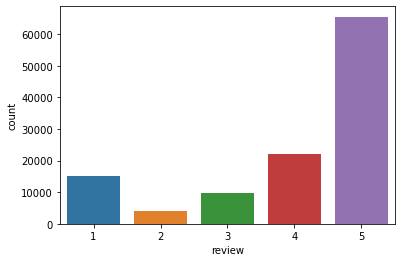

In [53]:
ax = sns.countplot(x="review", data=df)

In [54]:
#Visivelmente 5 é a avaliação mais comum

#### Obtenha as avaliações associadas a cada vendedor. Quais são os cinco que apresentam as melhores avaliações?

In [117]:
#Muitos estão empatados no topo com 5
novo=df.groupby('id_vendedor').mean()[['review']]
novo.sort_values(by=['review'], inplace=False, ascending=False).head(5)

,review
id_vendedor,
d3891911c2feae53c52fea2bd14054e5,5.0
1927cdb9fa74f5270097f6250e8e8f34,5.0
226b05fe067266c59c15dae208213d06,5.0
228e4c1a0be164f613d41c24345f9d2c,5.0
f5b84683a9bf9e1df748cf40f601b39c,5.0


#### Obtenha as avaliações associadas a cada categoria de produtos.

- Quais são as cinco que apresentam as melhores avaliações?
- Quais são as cinco que apresentam as piores avaliações?

In [56]:
#categoria
categoria=df.groupby('categoria').mean()[['review']]

#Top5
categoria.sort_values(by=['review'], inplace=False, ascending=False).head(5)

,review
categoria,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.431858
livros_importados,4.419355
livros_tecnicos,4.345588


In [57]:
#Bottom 5
categoria.sort_values(by=['review'], inplace=False, ascending=True).head(5)

,review
categoria,
seguros_e_servicos,2.500000
fraldas_higiene,3.256410
casa_conforto_2,3.387097
moveis_escritorio,3.516779
fashion_roupa_masculina,3.531034


### Analise, graficamente, a distribuição dos preços e fretes dos produtos.

<AxesSubplot:xlabel='preco', ylabel='frete'>

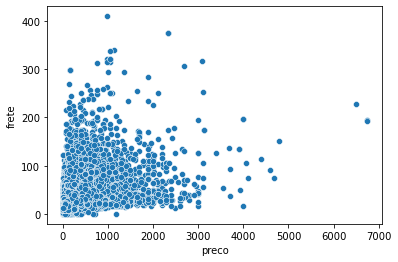

In [128]:
sns.scatterplot(data=df, x="preco", y="frete")

#### Qual é a média de preço e frete dos produtos por categoria?

> Analise graficamente, em ambos os casos. Considere apenas as 20 principais categorias nos gráficos.

In [59]:
c1 = df.groupby('categoria').mean()[['frete','preco']]
c1 = c1.sort_values(by=['preco'], inplace=False, ascending=False).head(20)
c1

,frete,preco
categoria,,
pcs,48.012727,1103.689136
portateis_casa_forno_e_cafe,36.982821,627.509103
eletrodomesticos_2,45.968229,457.390258
agro_industria_e_comercio,27.646111,332.706151
instrumentos_musicais,27.295494,293.398651
eletroportateis,23.952823,286.297248
telefonia_fixa,17.591728,226.989890
construcao_ferramentas_seguranca,20.043869,210.942261
relogios_presentes,16.823216,201.886842


<AxesSubplot:xlabel='preco', ylabel='frete'>

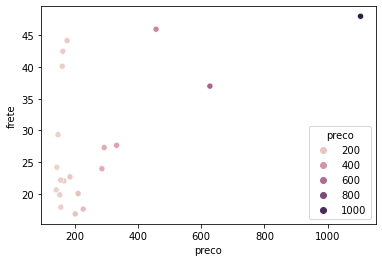

In [60]:
sns.scatterplot(data=c1, x="preco", y="frete",hue="preco")

**Crie uma tabela que contenha o tipo de pagamento nos índices, a categoria do produto nas colunas e o valor seja a média das avaliações para cada par (tipo de pagamento, categoria do produto).**

> Dica: utilize a função `crosstab` do pandas.

In [62]:
pd.crosstab(index = df.pagamento_tipo, columns = df.categoria, values = df.review, aggfunc = 'mean')

categoria,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,perfumaria,pet_shop,portateis_casa_forno_e_cafe,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
pagamento_tipo,,,,,,,,,,,,,,,,,,,,,
boleto,3.833333,4.160377,4.116883,4.021277,3.714286,3.818182,3.687500,3.726190,4.122183,3.992793,...,4.168350,4.269022,4.222222,3.924051,1.0,3.838710,4.277778,3.876833,3.444444,4.087349
credit_card,4.075862,4.120735,4.387755,3.875817,4.142857,3.666667,3.966667,3.844697,4.010015,3.995068,...,4.162679,4.169725,4.307692,4.019934,4.0,4.175573,3.984615,3.947415,3.737968,4.027435
debit_card,3.400000,4.736842,4.333333,3.833333,5.000000,5.000000,4.000000,5.000000,4.152778,4.022727,...,4.208333,3.529412,4.000000,4.047619,NaN,5.000000,NaN,4.075000,4.333333,4.210526
voucher,4.952381,4.300000,4.333333,4.076923,NaN,5.000000,4.000000,3.560000,4.121053,4.005814,...,3.517391,4.401961,5.000000,3.929961,NaN,2.400000,4.000000,4.031963,3.600000,4.088757


#### Qual é o principal meio de pagamento utilizado pelos clientes?

> Visualize essa resposta, também, de forma gráfica.

In [63]:
df['pagamento_tipo'].value_counts()

credit_card    86012
boleto         22692
voucher         6211
debit_card      1666
Name: pagamento_tipo, dtype: int64

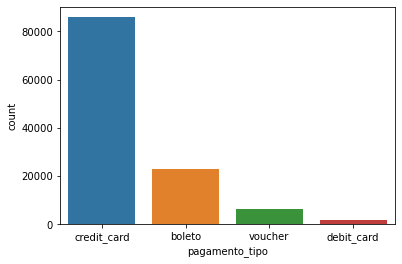

In [64]:
ax = sns.countplot(x="pagamento_tipo", data=df)

#### Em quantas parcelas os clientes que compram em cartão de crédito costumam dividir suas compras?

> Visualize esse resultado, também, graficamente.

In [65]:
card = df.where(df['pagamento_tipo'] == 'credit_card')
card['pagamento_prestacoes'].mean()

3.6425149979072686

In [66]:
card['pagamento_prestacoes'].value_counts().head(7)

1.0     27461
2.0     13515
3.0     11653
4.0      7926
10.0     6867
5.0      5983
8.0      5055
Name: pagamento_prestacoes, dtype: int64

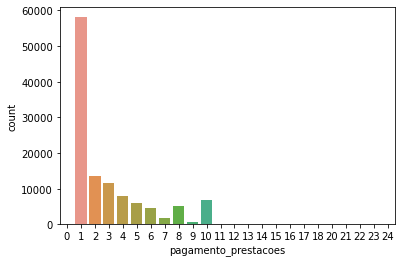

In [67]:
ax = sns.countplot(x="pagamento_prestacoes", data=df)

####

#### Utilize o percentil para responder a seguinte pergunta:

**30% dos clientes fazem compras no valor (preço) de até quanto?**

In [68]:
df['preco'].quantile(q=0.3)

47.6

In [69]:
df['preco'].quantile([.25, .5, .75])

0.25     39.9
0.50     74.9
0.75    134.9
Name: preco, dtype: float64

###### Média de preço para cliente único

In [131]:
pc = df.groupby(['id_cliente']).mean()[['preco']]

In [132]:
pc['preco'].quantile(q=0.3)

49.0

In [133]:
pc['preco'].quantile([.25, .5, .75])

0.25     42.0
0.50     79.0
0.75    139.9
Name: preco, dtype: float64

#### Transforme a coluna `horario_pedido` para o formato `datetime` do Python e, em seguida, avalie o valor total de vendas realizadas por dia, durante todo o intervalo disponível no dataset.

In [70]:
#Primeira Abordagem
#Converter para datetime
df['horario_pedido'] = pd.to_datetime(df['horario_pedido'], format='%Y-%m-%d %H:%M:%S')
#df.strptime()

In [71]:
#df['horario_pedido'].dt.day
df.groupby(df['horario_pedido'].dt.day).sum()[['preco']]

#Analise por dia do mes, todos os dias tem um valor parecido
#Menos o 31 porque nem todo mes tem 31

,preco
horario_pedido,
1,466142.42
2,456050.10
3,466292.27
4,495320.15
5,491447.59
6,503291.75
7,488830.76
8,443033.44
9,470131.77


In [73]:
#Abordagem final
df['dia'] = df['horario_pedido'].dt.date
dia = df.groupby([df['dia']]).sum()[['preco']]
dia

,preco
dia,
2016-09-04,72.89
2016-09-05,59.50
2016-10-02,100.00
2016-10-03,463.48
2016-10-04,10438.27
...,...
2018-08-26,8235.71
2018-08-27,4870.87
2018-08-28,3757.51


<AxesSubplot:xlabel='dia'>

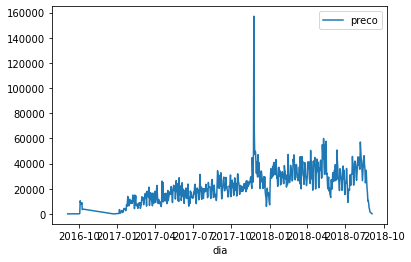

In [74]:
sns.lineplot(data=dia)

In [75]:
#fim